In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def matrixFromFile(fileName):
    with open("out.mtx",'r') as file:
        content = file.readlines()
    
    params = content[0].split()
    rows = int(params[0])
    cols = int(params[1])
    n = int(params[2])

    A = np.zeros((rows,cols))

    content.pop(0)
    for elemento in content:
        params = elemento.split()
        i = int(params[0])
        j = int(params[1])
        val = float(params[2])

        A[i,j] = val

    return A

In [36]:
N = 6
!rm out.mtx
!./prova {N}

Non zero entries = 100


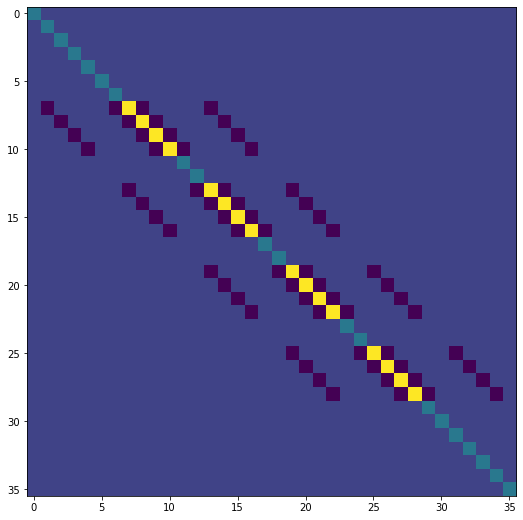

In [37]:
mat = matrixFromFile('out.mtx')

plt.rcParams['figure.figsize'] = [16,9]
plt.imshow(mat)
plt.show()